In [83]:
#import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ffnote 

import nltk
from nltk.corpus import stopwords
import string
from sklearn.metrics import confusion_matrix, classification_report

#Download the following modules once
nltk.download('stopwords')
nltk.download('wordnet')

#import Pretty Table
from prettytable import PrettyTable

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_excel("Participants_Data_News_category/Data_Train.xlsx")
df.head(10)

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ‘...",1
4,"In global markets, gold prices edged up today ...",3
5,BEIJING: Chinese tech giant Huawei has announc...,1
6,Mumbai: India Inc's external commercial borrow...,3
7,"On Wednesday, Federal Reserve Chairman Jerome ...",3
8,What more can you give to the audience? I have...,2
9,"com, Arbaaz Khan spoke about getting back to D...",2


## EDA

In [3]:
df.SECTION.value_counts()

1    2772
2    1924
0    1686
3    1246
Name: SECTION, dtype: int64

In [4]:
#0 = politics
#1 = tech
#2 = etertaiment
#3 = stock marketing

In [5]:
#How many sections are 3?
df[df.SECTION==3]


,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
2,Most Asian currencies were trading lower today...,3
4,"In global markets, gold prices edged up today ...",3
6,Mumbai: India Inc's external commercial borrow...,3
7,"On Wednesday, Federal Reserve Chairman Jerome ...",3
...,...,...
7600,"During the day, the markets saw high volatilit...",3
7603,Investors are awaiting economic growth data an...,3
7607,"The watchdog passed five separate orders, toge...",3
7614,"The S&P 500 opened higher by 1.26 points, or 0...",3


In [6]:
df[df.SECTION==2]

,STORY,SECTION
8,What more can you give to the audience? I have...,2
9,"com, Arbaaz Khan spoke about getting back to D...",2
18,"He chooses to hide his CP from colleagues, mov...",2
21,"Starring Varun Dhawan, Alia Bhatt, Sonakshi Si...",2
29,"”With two releases this year so far, Milan Tal...",2
...,...,...
7611,And I didn’t want to do that kind of movie bec...,2
7612,His 1999 film All About My Mother received Bes...,2
7620,Bollywood celebrities took to social media to ...,2
7624,"The film, which also features Janhvi Kapoor, w...",2


In [7]:
#Printing the group by description of each category
df.groupby("SECTION").describe()

STORY                                                               
        count unique                                                top freq
SECTION                                                                     
0        1686   1673  This story has been published from a wire agen...    4
1        2772   2731  This story has been published from a wire agen...   13
2        1924   1914  The consensus reads, “Exciting, entertaining, ...    3
3        1246   1233  This story has been published from a wire agen...   11

In [8]:
#remove dplicate records from dataset
df.drop_duplicates(inplace = True)

In [23]:
#duplicate records have been removed
df.groupby("SECTION").describe()

STORY                                                               
        count unique                                                top freq
SECTION                                                                     
0        1673   1673  BJP candidate from Ahmednagar Sujay Vikhe Pati...    1
1        2731   2731  While some scepticism remains about how far an...    1
2        1914   1914  With Avengers: Endgame, the two-movie storylin...    1
3        1233   1233  The company executes all types of railway proj...    1

# Text Preprocessing

In [9]:
#A punctuations string for reference (added other valid characters from the dataset)
all_punctuations = string.punctuation + '‘’,:”][],'

In [10]:
#Method to remove punctuation marks from the data
def punc_remover(raw_text):
    no_punct = "".join([i for i in raw_text if i not in all_punctuations])
    return no_punct

In [11]:
#Method to remove stopwords from the data
def stopword_remover(no_punc_text):
    words = no_punc_text.split()
    no_stp_words = " ".join([i for i in words if i not in stopwords.words('english')])
    return no_stp_words

In [12]:
#Method to lemmatize the words in the data
lemmer = nltk.stem.WordNetLemmatizer()
def lem(words):
    return " ".join([lemmer.lemmatize(word,'v') for word in words.split()])

In [13]:
#Method to perform a complete cleaning
def text_cleaner(raw):
    cleaned_text = stopword_remover(punc_remover(raw))
    return lem(cleaned_text)

In [14]:
#Testing the cleaner method
text_cleaner("Hi!, this is a \n sample text to test the text cleaner method. Removes *@!#special characters%$^* and stopwords. And lemmatizes, go, going - run, ran, running")

'Hi sample text test text cleaner method Removes special character stopwords And lemmatizes go go run run run'

In [16]:
# #Applying the cleaner method to the entire data
# df['text']=df['STORY'].apply(text_cleaner)

In [ ]:
# %%time
# from collections import Counter
# df['temp_list'] = df['text'].apply(lambda x:str(x).split())
# top = Counter([item for sublist in df['temp_list'] for item in sublist])
# temp = pd.DataFrame(top.most_common(40))
# temp.columns = ['Common_words','count']
# temp.style.background_gradient(cmap='Blues')

In [18]:
#loading preprocess data
df = pd.read_csv("clean_data.csv")

# Train Test Split

In [19]:
X = df.text
y = df.SECTION

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.30, random_state = 42)

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5285,)
(5285,)
(2266,)
(2266,)


In [22]:
y_train.value_counts()

1    1911
2    1340
0    1171
3     863
Name: SECTION, dtype: int64

In [23]:
y_test.value_counts()

1    820
2    574
0    502
3    370
Name: SECTION, dtype: int64

# Featurization

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,1))
#fitting the train dataset
# count_vect.fit(X_train)

#trasforming data into vectors
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [25]:
print(X_train_vect.shape)
# print(y_train.shape)
print(X_test_vect.shape)
# print(y_test.shape)

(5285, 29592)
(2266, 29592)


# Models

# 1.  Logistic Regression

### Fitting model

In [26]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_vect, y_train)

LogisticRegression()

### Testing model on train and test

#### 1. Testing on test data set

In [35]:
y_pred = clf.predict(X_test_vect)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       502
           1       0.96      0.98      0.97       820
           2       0.94      0.99      0.97       574
           3       0.99      0.95      0.97       370

    accuracy                           0.97      2266
   macro avg       0.97      0.96      0.97      2266
weighted avg       0.97      0.97      0.97      2266



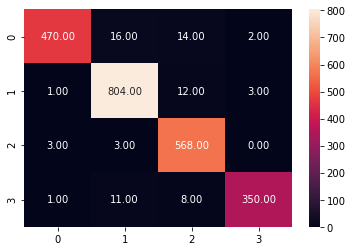

In [41]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.2f')

#### 2. Testing on train data set

In [47]:
y_pred_train = clf.predict(X_train_vect)

In [50]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1171
           1       0.99      1.00      0.99      1911
           2       0.99      0.99      0.99      1340
           3       0.99      1.00      0.99       863

    accuracy                           0.99      5285
   macro avg       0.99      0.99      0.99      5285
weighted avg       0.99      0.99      0.99      5285



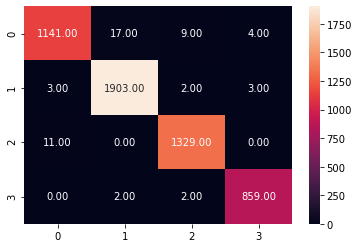

In [54]:
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='.2f')

# 2. SVM

### 1. Fitting model

In [55]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_vect, y_train)

SVC()

### Testing model on train and test data

#### 1. Testing model on train data set

In [56]:
y_train_svc = svc.predict(X_train_vect)

In [57]:
print(classification_report(y_train, y_train_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1171
           1       1.00      1.00      1.00      1911
           2       1.00      1.00      1.00      1340
           3       1.00      1.00      1.00       863

    accuracy                           1.00      5285
   macro avg       1.00      1.00      1.00      5285
weighted avg       1.00      1.00      1.00      5285



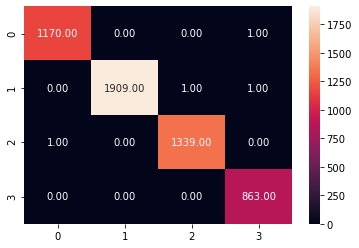

In [58]:
sns.heatmap(confusion_matrix(y_train, y_train_svc), annot = True, fmt='.2f')

#### 2. Testing model on train test data

In [59]:
y_test_pred = svc.predict(X_test_vect)

In [68]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       502
           1       0.97      0.98      0.98       820
           2       0.94      0.99      0.97       574
           3       0.98      0.95      0.96       370

    accuracy                           0.97      2266
   macro avg       0.97      0.96      0.97      2266
weighted avg       0.97      0.97      0.97      2266



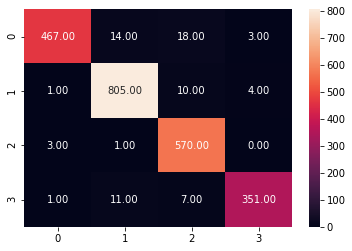

In [69]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt='.2f')

# 3. Decision Tree

## Fitting model

In [63]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_vect, y_train)

DecisionTreeClassifier()

### Testing model on Train and Test

#### 1. Testing model on Train data

In [64]:
y_predict_train = dtc.predict(X_train_vect)

In [65]:
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1171
           1       1.00      1.00      1.00      1911
           2       1.00      1.00      1.00      1340
           3       1.00      1.00      1.00       863

    accuracy                           1.00      5285
   macro avg       1.00      1.00      1.00      5285
weighted avg       1.00      1.00      1.00      5285



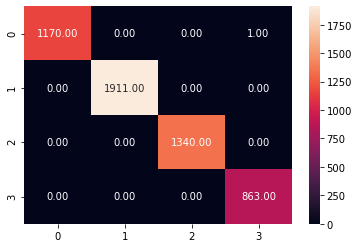

In [67]:
sns.heatmap(confusion_matrix(y_train, y_predict_train),annot = True, fmt='.2f')

#### 2. Testing model on test data

In [70]:
y_test_pred = dtc.predict(X_test_vect)

In [71]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       502
           1       0.85      0.87      0.86       820
           2       0.86      0.89      0.88       574
           3       0.82      0.81      0.81       370

    accuracy                           0.86      2266
   macro avg       0.86      0.86      0.86      2266
weighted avg       0.87      0.86      0.87      2266



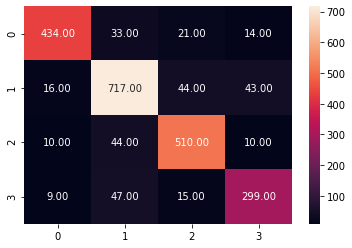

In [73]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt='.2f')

# 4. Random Forest

# Fitting model

In [74]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_vect, y_train)

RandomForestClassifier()

### 1. Testing model on Train data

In [75]:
y_pred_train = rfc.predict(X_train_vect)

In [76]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1171
           1       1.00      1.00      1.00      1911
           2       1.00      1.00      1.00      1340
           3       1.00      1.00      1.00       863

    accuracy                           1.00      5285
   macro avg       1.00      1.00      1.00      5285
weighted avg       1.00      1.00      1.00      5285



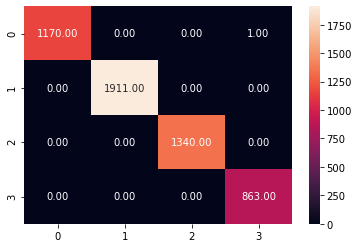

In [78]:
sns.heatmap(confusion_matrix(y_train, y_pred_train),annot = True, fmt='.2f')

### 2. Testing model on test data

In [79]:
y_test_pred = rfc.predict(X_test_vect)

In [80]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       502
           1       0.96      0.96      0.96       820
           2       0.92      0.98      0.95       574
           3       0.97      0.91      0.94       370

    accuracy                           0.95      2266
   macro avg       0.95      0.95      0.95      2266
weighted avg       0.95      0.95      0.95      2266



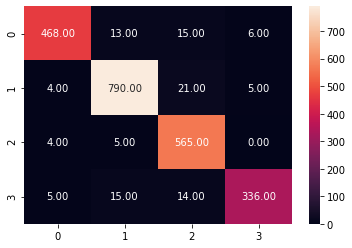

In [82]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt='.2f')

# Conclusion

In [84]:
myTable = PrettyTable(["Model Name", "Train f1", "Test f1"])
  
# Add rows
myTable.add_row(["Logistic Regression", "0.99", "0.97"])
myTable.add_row(["SVM", "1.00", "0.97"])
myTable.add_row(["Decision Tree", "1.00", "0.87"])
myTable.add_row(["Random Forest", "1.00", "0.95"])
  
print(myTable)

+---------------------+----------+---------+
|      Model Name     | Train f1 | Test f1 |
+---------------------+----------+---------+
| Logistic Regression |   0.99   |   0.97  |
|         SVM         |   1.00   |   0.97  |
|    Decision Tree    |   1.00   |   0.87  |
|    Random Forest    |   1.00   |   0.95  |
+---------------------+----------+---------+


- From above analysis Logistic Regression is found to be our best model as it has same test accuracy as SVM and has less Space TIme Complexity.

# Original Test Data

In [135]:
X

0       But painful huge reversal fee income unheard a...
1       How formidable opposition alliance among Congr...
2       Most Asian currencies trade lower today South ...
3       If want answer question click Answer After cli...
4       In global market gold price edge today disappo...
                              ...                        
7623    Karnataka Congress bastion also give BJP first...
7624    The film also feature Janhvi Kapoor revolve ar...
7625    The database create bring together criminal re...
7626    The state uneasy relationship mainland since d...
7627    Virus star Kunchacko Boban Tovino Thomas Indra...
Name: text, Length: 7551, dtype: object

In [159]:
clf_test = TfidfVectorizer()
clf_data = clf_test.fit_transform(X)

In [161]:
clf_data.shape

(7551, 35189)

In [140]:
sv_all = SVC()
sv_all.fit(X_all,y)

SVC()

In [141]:
tt = pd.read_excel('Participants_Data_News_category/Data_Test.xlsx')

In [142]:
tt.head(5)

,STORY
0,2019 will see gadgets like gaming smartphones ...
1,It has also unleashed a wave of changes in the...
2,It can be confusing to pick the right smartpho...
3,The mobile application is integrated with a da...
4,We have rounded up some of the gadgets that sh...


In [143]:
#Applying the cleaner method to the entire data
tt['text']=tt['STORY'].apply(text_cleaner)

In [144]:
tt.head(5)

,STORY,text
0,2019 will see gadgets like gaming smartphones ...,2019 see gadgets like game smartphones wearabl...
1,It has also unleashed a wave of changes in the...,It also unleash wave change MCU make sure futu...
2,It can be confusing to pick the right smartpho...,It confuse pick right smartphone segregate top...
3,The mobile application is integrated with a da...,The mobile application integrate dashboard con...
4,We have rounded up some of the gadgets that sh...,We round gadgets show 2018 leave indelible mar...


In [145]:
tt['text']

0       2019 see gadgets like game smartphones wearabl...
1       It also unleash wave change MCU make sure futu...
2       It confuse pick right smartphone segregate top...
3       The mobile application integrate dashboard con...
4       We round gadgets show 2018 leave indelible mar...
                              ...                        
2743    According researchers fraud mobile channel gro...
2744    The iPhone XS XS Max share Apple A12 chipset a...
2745    On photography front Note 5 Pro feature 12MP 1...
2746    UDAY mandate discoms bring gap average revenue...
2747    Ripple also help bank customers send money peo...
Name: text, Length: 2748, dtype: object

In [162]:
tt_vect = clf_test.transform(tt.text)

In [163]:
tt_vect.shape

(2748, 35189)

In [151]:
pd.DataFrame(preds)

,0
0,1
1,2
2,1
3,1
4,1
...,...
2743,1
2744,1
2745,1
2746,0


# For Submission 

In [152]:
pd.DataFrame(preds).rename(columns={0:'SECTION'}).to_excel('svm1_all.xlsx',index=False)